In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import colorsys
sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as MSE,mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE,r2_score
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('California Housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<font color=#6699CC><u>**Project Description:**</u>\
<font color=#6699CC>**1. longitude: A measure of how far west a house is; a higher value is farther west**\
<font color=#6699CC>**2. latitude: A measure of how far north a house is; a higher value is farther north**\
<font color=#6699CC>**3. housingMedianAge: Median age of a house within a block; a lower number is a newer building**\
<font color=#6699CC>**4. totalRooms: Total number of rooms within a block**\
<font color=#6699CC>**5. totalBedrooms: Total number of bedrooms within a block**\
<font color=#6699CC>**6. population: Total number of people residing within a block**\
<font color=#6699CC>**7. households: Total number of households, a group of people residing within a home unit, for a block**\
<font color=#6699CC>**8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)**\
<font color=#6699CC>**9. medianHouseValue: Median house value for households within a block (measured in US Dollars)**\
<font color=#6699CC>**10. oceanProximity: Location of the house w.r.t ocean/sea**

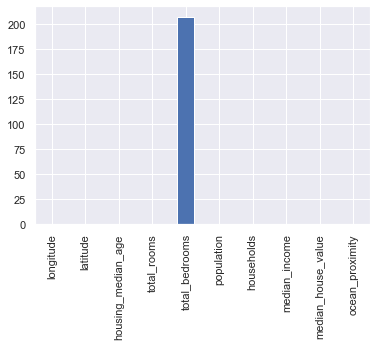

In [3]:
sns.set()
df.isna().sum().plot(kind='bar')
plt.show()

<font color=#228C22>**<u><strong>Observations</u>**\
<font color=#228C22>**1. Total_bedrooms contains missing Values**\
<font color=#228C22>**2. All Data types are float and only one string feature**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<font color=#000ff>**Process**\
<font color=#000ff>**Function to check distribution of features(univariante analysis).**

In [5]:
sns.set()
def continousFeatureAnalysis(data,column):
    """Function to see the distribution of column feature and detect outlier"""
    plt.figure(figsize=(15,5))
    ax = sns.kdeplot(data = data, x = column,color='black')
    ax.axvline(data[column].mean(),linestyle ='--',color='green',label='mean')
    ax.axvline(data[column].median(),linestyle ='--',color='red',label='median')
    ax.axvline(data[column].min(),linestyle ='--',color='blue',label='min')
    ax.axvline(data[column].max(),linestyle ='--',color='orange',label='max')
    ax.axvline(data[column].describe()['25%'],linestyle ='--',color='yellow',label='First Quartile')
    ax.axvline(data[column].describe()['75%'],linestyle ='--',color='brown',label='Third Quartile')
    plt.legend(loc='upper right')
    plt.title(column,fontdict={'fontsize':15},color='blue')
    plt.plot()

<font color=#228C22>**<u><strong>Observations</u>**\
<font color=#228C22>**3. Housing Age semi normally distributed**

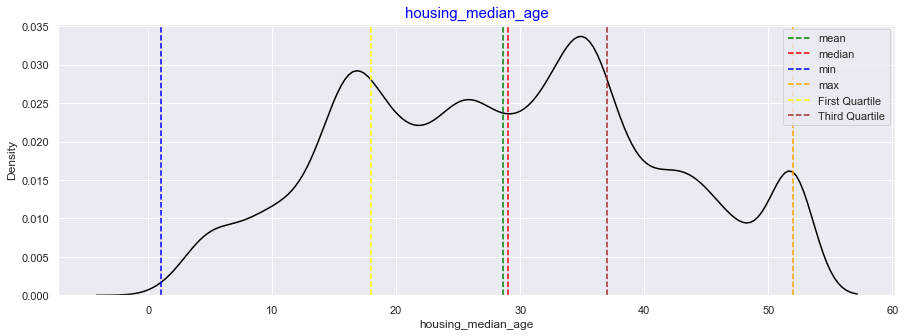

In [6]:
continousFeatureAnalysis(df,'housing_median_age')

In [7]:
df['housing_median_age'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

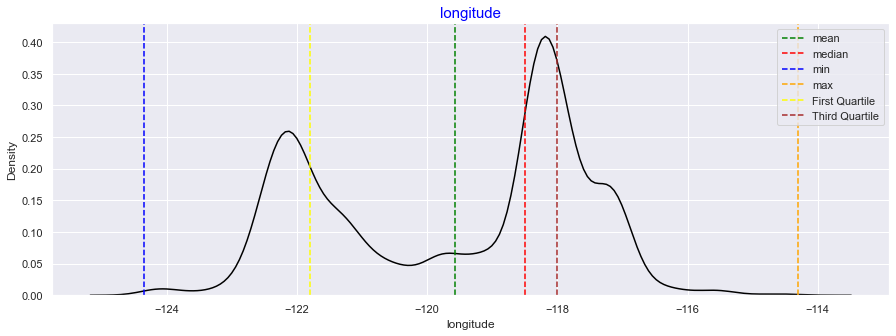

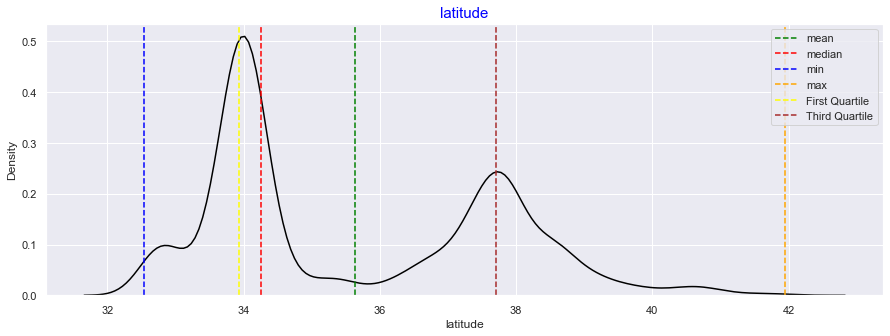

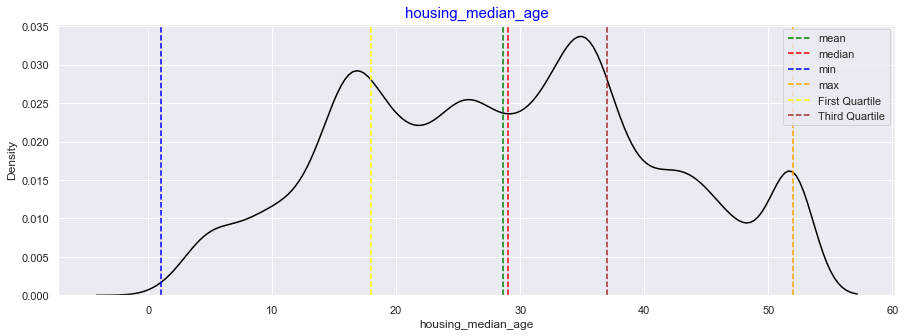

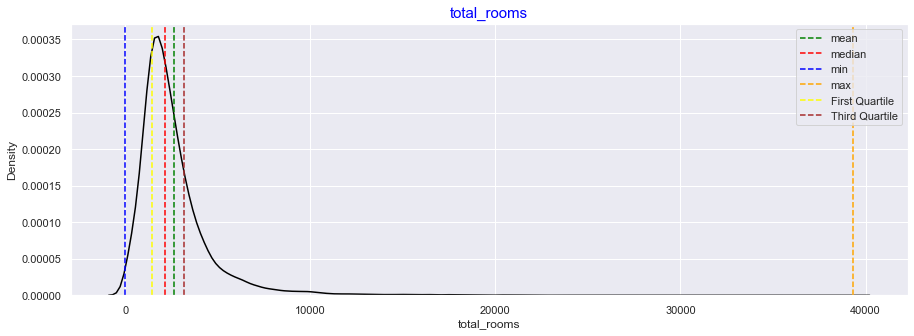

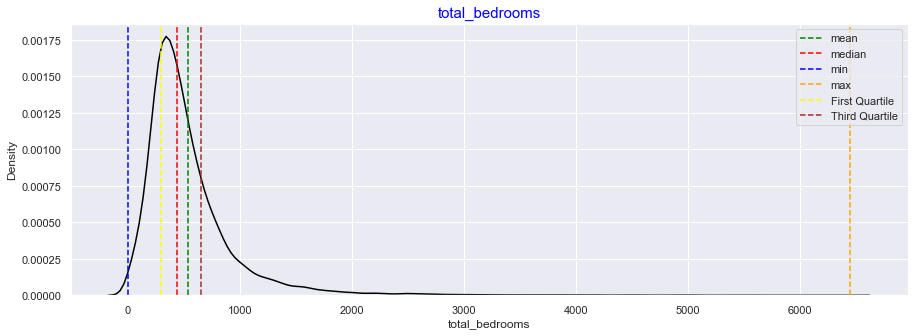

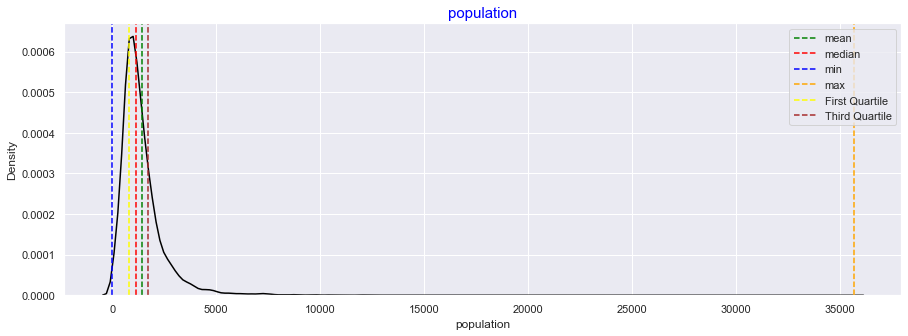

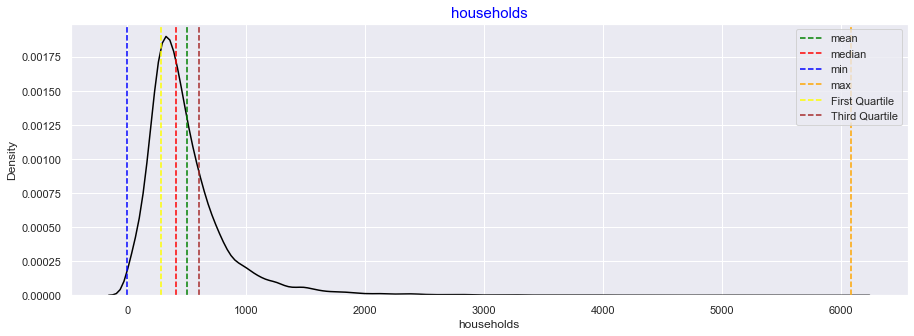

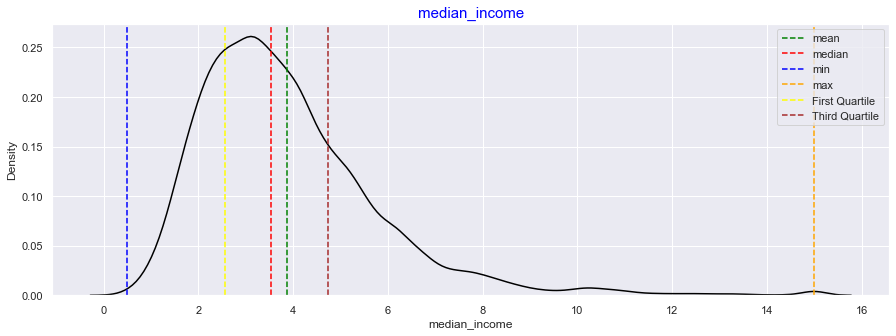

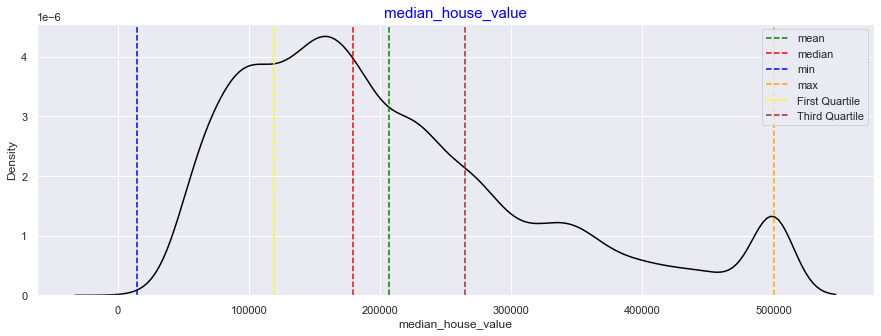

In [8]:
for column in df.describe().columns.tolist():
    continousFeatureAnalysis(df,column)

<font color=#228C22>**<u><strong>Observations</u>**\
<font color=#228C22>**1. increase of houses near -122 and -118 in longitude.**\
<font color=#228C22>**2. increase of houses near 34 and 35 in latitude.**\
<font color=#228C22>**3. Housing Age semi normally distributed**\
<font color=#228C22>**4. total_rooms/bedrooms/population and households are left skewed and right outlier was detected.**\
<font color=#228C22>**5. slight left skewed in median income and right outlier was detected.**\
<font color=#228C22>**6. approx. normal distribution in the median_house_value.**

In [9]:
df['total_rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

In [10]:
def extract_outliers(data,column,*,negative_accept=True,threshold=1.5):
    q1 = data[column].describe()['25%']
    q3 = data[column].describe()['75%']
    min_value = data[column].describe()['min']
    iqr = q3 - q1
    upper_bound = q3 + (threshold*iqr)
    lower_bound = q1-(threshold*iqr)
    if not negative_accept:
        if lower_bound < min_value:
            lower_bound = min_value
    print(f'Interquartile Region for {column}: ({lower_bound} , {upper_bound})')
    outliers = data[column][(data[column] <= lower_bound) | (data[column] >= upper_bound)]
    return lower_bound, upper_bound, outliers

extract_outliers(df,'total_rooms',negative_accept=False,threshold=3)

Interquartile Region for total_rooms: (2.0 , 8248.75)


(2.0,
 8248.75,
 283      12842.0
 570      18634.0
 576      14316.0
 706       8299.0
 780       9963.0
           ...   
 20530    15018.0
 20539     8627.0
 20544     8800.0
 20563    12139.0
 20629    10035.0
 Name: total_rooms, Length: 495, dtype: float64)

In [11]:
extract_outliers(df,'total_bedrooms',negative_accept=False,threshold=3)

Interquartile Region for total_bedrooms: (1.0 , 1700.0)


(1.0,
 1700.0,
 95       2477.0
 104      1914.0
 116      1750.0
 283      2048.0
 485      1744.0
           ...  
 20530    3008.0
 20543    1820.0
 20544    1857.0
 20563    2640.0
 20629    1856.0
 Name: total_bedrooms, Length: 444, dtype: float64)

In [12]:
extract_outliers(df,'population',negative_accept=False,threshold=3)

Interquartile Region for population: (3.0 , 4539.0)


(3.0,
 4539.0,
 283      4985.0
 570      7427.0
 576      5781.0
 780      5613.0
 799      5436.0
           ...  
 20529    5633.0
 20530    7984.0
 20544    6330.0
 20563    6837.0
 20629    6912.0
 Name: population, Length: 422, dtype: float64)

In [13]:
extract_outliers(df,'households',negative_accept=False,threshold=3)

Interquartile Region for households: (1.0 , 1580.0)


(1.0,
 1580.0,
 95       2323.0
 104      1789.0
 116      1661.0
 283      1967.0
 485      1742.0
           ...  
 20530    2962.0
 20543    1767.0
 20544    1832.0
 20563    2358.0
 20629    1818.0
 Name: households, Length: 419, dtype: float64)

In [14]:
extract_outliers(df,'median_income',negative_accept=False,threshold=3)

Interquartile Region for median_income: (0.4999 , 11.2828)


(0.4999,
 11.2828,
 73        0.4999
 131      11.6017
 510      11.8603
 511      13.4990
 512      12.2138
           ...   
 19523     0.4999
 19800     0.4999
 20091     0.4999
 20163    12.6320
 20436    12.5420
 Name: median_income, Length: 152, dtype: float64)

<font color=#228C22>**<u><strong>Observations</u>**\
<font color=#228C22>**1. 495 outliers are detected in 'total_rooms' .**\
<font color=#228C22>**2. 444 outliers are detected in 'total_bedrooms'.**\
<font color=#228C22>**3. 422 outliers are detected in 'population'.**\
<font color=#228C22>**4. 419 outliers are detected in 'households'.**\
<font color=#228C22>**5. 152 outliers are detected in 'median_income'.**\
<font color=#FF0000>**Interquartile Region for total_rooms: (2.0 , 8248.75)**\
<font color=#FF0000>**Interquartile Region for total_bedrooms: (1.0 , 1700.0)**\
<font color=#FF0000>**Interquartile Region for population: (3.0 , 4539.0)**\
<font color=#FF0000>**Interquartile Region for households: (1.0 , 1580.0)**\
<font color=#FF0000>**Interquartile Region for median_income: (0.4999 , 11.2828)**\
<font color=#228C22>**May some are the same observations by index appears above.**

<font color=#000ff>**Process**\
<font color=#000ff>**I'll try to solve the outliers issue.**

In [15]:
def substituteOutliersWithBoundary(data,column):
    lower_boundary, upper_boundary, column_outliers = extract_outliers(data,column,negative_accept=False,threshold=3)
    column_index = data.columns.tolist().index(column)
    for i, j in zip(column_outliers.index,column_outliers.values):
        if j <= lower_boundary:
            df.iloc[i,column_index] = lower_boundary
        elif j >= upper_boundary:
            df.iloc[i,column_index] = upper_boundary

In [16]:
features_with_outliers = ['total_rooms', 'total_bedrooms', 'population', 'households','median_income']

In [17]:
for outlier_column in features_with_outliers:
    substituteOutliersWithBoundary(df,outlier_column)

Interquartile Region for total_rooms: (2.0 , 8248.75)
Interquartile Region for total_bedrooms: (1.0 , 1700.0)
Interquartile Region for population: (3.0 , 4539.0)
Interquartile Region for households: (1.0 , 1580.0)
Interquartile Region for median_income: (0.4999 , 11.2828)


<font color=#000ff>**check if succeeded**

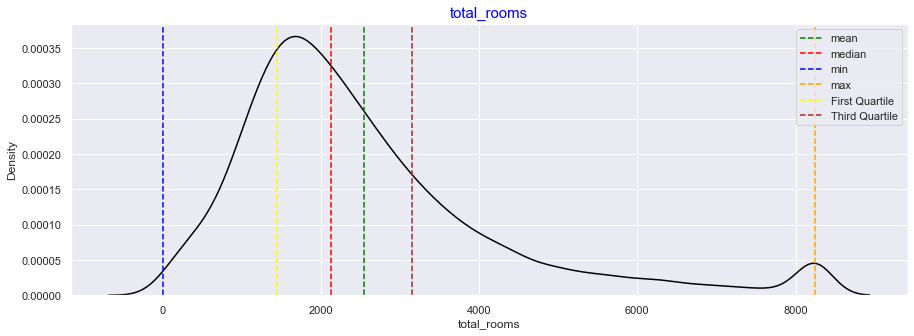

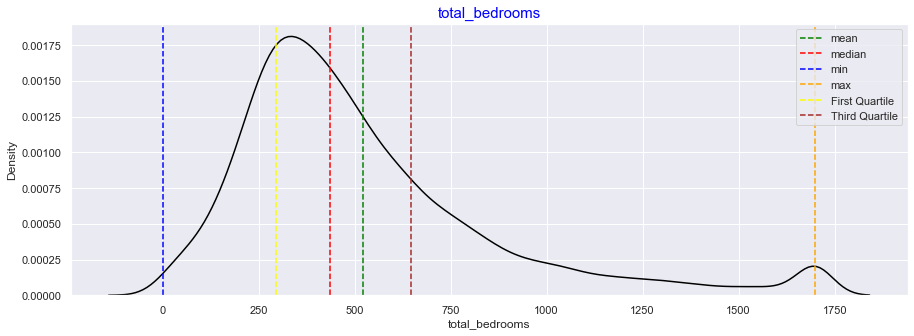

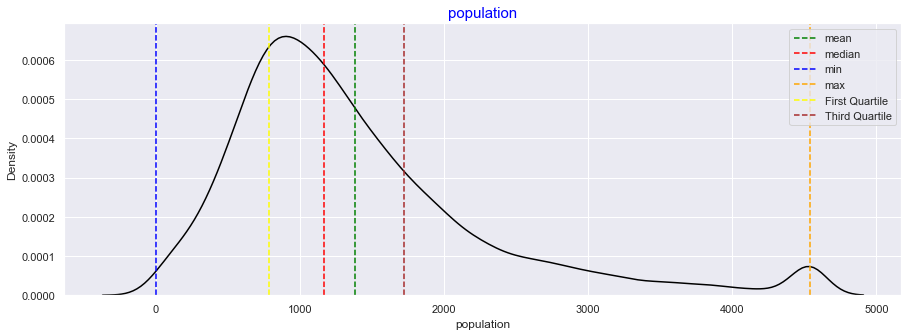

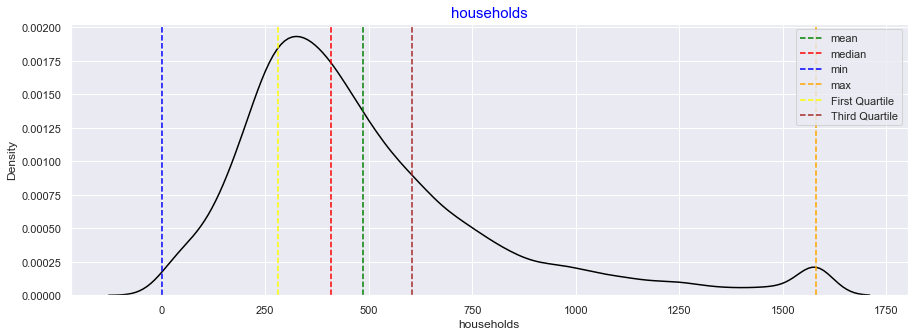

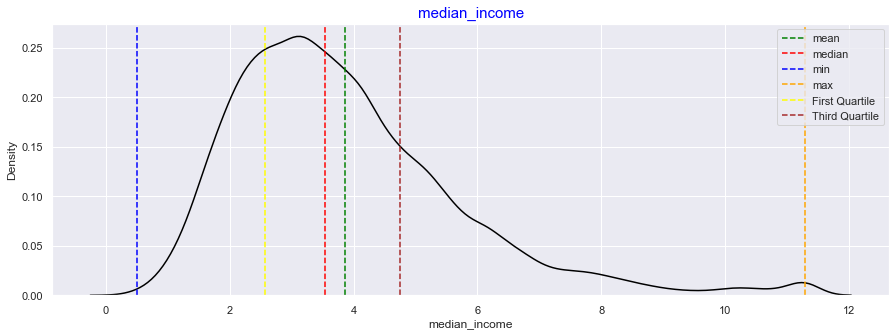

In [18]:
for outlier_column in features_with_outliers:
    continousFeatureAnalysis(df,outlier_column)

<font color=#000ff>**Start solving missing values**

In [19]:
def showCorrelationOnData(data,*,threshold=None):
    sns.set_theme(style="white")
    corr = data.corr()
    if threshold:
        corr = data.corr()[(data.corr() >= threshold) | (data.corr() <= -threshold)]
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(10, 10))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, \
                cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":12})
    plt.show()

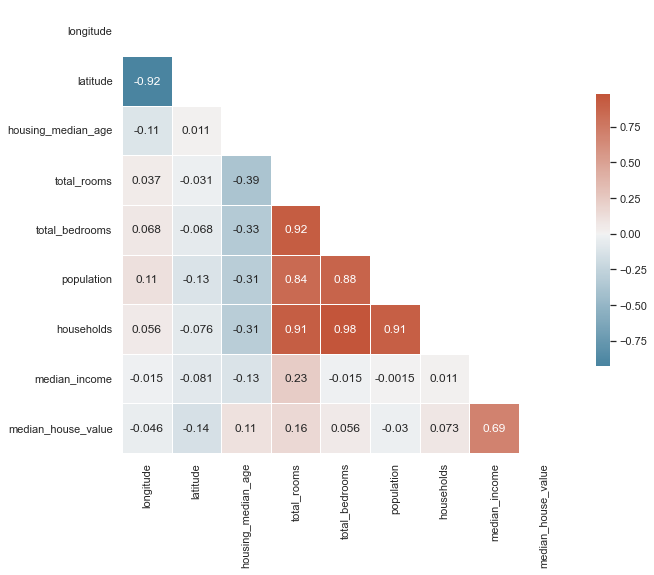

In [20]:
showCorrelationOnData(df)

In [21]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<font color=#228C22>**<u><strong>Observations</u>**\
<font color=#228C22>**there're linear correlation between total_bedrooms and [population, total_rooms, households] .**

<font color=#000ff>**i'll use Linear regression to istimate the missing values**

In [22]:
df_fill = df[['population', 'total_rooms', 'households','total_bedrooms']]
df_fill['index_'] = df_fill.index.tolist()

C:\Users\amira\AppData\Local\Temp\ipykernel_9180\3564749005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fill['index_'] = df_fill.index.tolist()


In [23]:
df_fill.head()

,population,total_rooms,households,total_bedrooms,index_
0,322.0,880.0,126.0,129.0,0
1,2401.0,7099.0,1138.0,1106.0,1
2,496.0,1467.0,177.0,190.0,2
3,558.0,1274.0,219.0,235.0,3
4,565.0,1627.0,259.0,280.0,4


In [24]:
indices_for_imputing = df_fill[df_fill['total_bedrooms'].isna()]['index_']
indices_for_imputing

290        290
341        341
538        538
563        563
696        696
         ...  
20267    20267
20268    20268
20372    20372
20460    20460
20484    20484
Name: index_, Length: 207, dtype: int64

In [25]:
training_data = df_fill[~df_fill['total_bedrooms'].isna()]
filling_data = df_fill[df_fill['total_bedrooms'].isna()]

In [26]:
df_fill_X = training_data.drop(['total_bedrooms','index_'],axis=1).values
df_fill_y = training_data['total_bedrooms'].values

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(df_fill_X, df_fill_y)

LinearRegression()

In [28]:
filling_data_X = filling_data.drop(['total_bedrooms','index_'],axis=1).values

In [29]:
filling_data_y = lin_reg.predict(filling_data_X)

In [30]:
df.iloc[indices_for_imputing,4] = filling_data_y

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


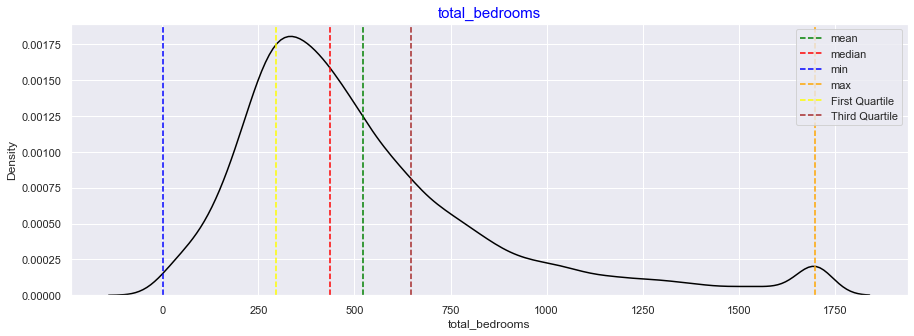

In [32]:
sns.set()
continousFeatureAnalysis(df,'total_bedrooms')

<font color=#228C22>**<u><strong>Observations</u>**\
<font color=#228C22>**Null values solved.**

<font color=#000ff>**EDA Process**

<font color=#000ff>**Showing Locations of houses**

In [33]:
def generate_colors_for_column(column):  
    def AutoGenerateColorByNumber(N):
        HSV_tuples = [(x*1.0/N, 0.5, 0.5) for x in range(N)]
        RGB_tuples = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))
        return RGB_tuples
    names = column.unique().tolist()
    colors = AutoGenerateColorByNumber(len(names))
    dict_colors = {names[i]:colors[i] for i in range(len(names))}
    return dict_colors

In [ ]:
def plotLocationOnMap(latitude_col,longitude_column,label_column):
    label_colors = generate_colors_for_column(label_column)
    center_location = [latitude_col.mean(),longitude_column.mean()]
    center_map = folium.Map(location = center_location, zoom_start=4, tiles = 'Stamen Terrain')
    locations = folium.map.FeatureGroup()
    for lat,long,lab in zip(latitude_col,longitude_column,label_column):
        locations.add_child(folium.features.CircleMarker([lat,long],radius=5,color='blue',\
                                                         fill=True,fill_color='yellow',fill_opacity=0.6))

        locations.add_child(folium.Marker([lat,long],popup=str(lab),icon=folium.Icon(color=label_colors[lab])))
    center_map.add_child(locations)
    return center_map

map_ = plotLocationOnMap(df['latitude'], df['longitude'], df['ocean_proximity'])
map_

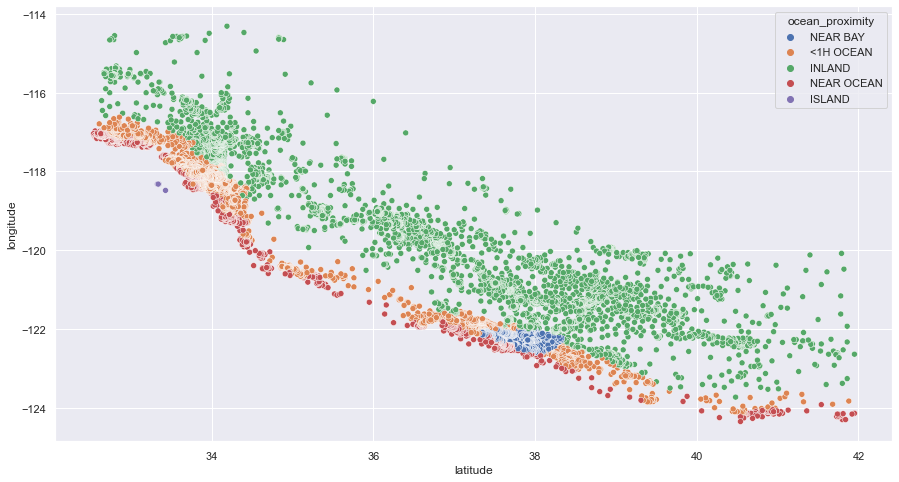

In [34]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude',data=df,hue='ocean_proximity')
plt.show()

<font color=#228C22>**<u><strong>Observations</u>**\
<font color=#228C22>**locations appeared by their locations to Ocean, Most of the 'Inland' distributed widely more than others\
    and few in "Island" although 1H ocean are greater number than others**

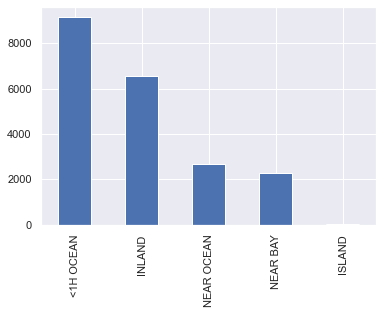

In [35]:
df['ocean_proximity'].value_counts().plot(kind='bar')
plt.show()

In [36]:
def myround(x, base=5):
    return base * round(x/base)

def remapColumn(data,column):
    column_required = data[column]
    result = []
    for i in list(range(round(column_required.min()), round(column_required.max()),round(column_required.max() / 6))):
        result.append(myround(i))
    data.loc[column_required <= result[1], column] = result[1]
    data.loc[(column_required > result[1]) & (column_required <= result[2]), column] = result[2]
    data.loc[(column_required > result[2]) & (column_required <= result[3]), column] = result[3]
    data.loc[(column_required > result[3]) & (column_required <= result[4]), column] = result[4]
    data.loc[column_required > result[4], column] = result[5]

In [37]:
remapColumn(df,'housing_median_age')

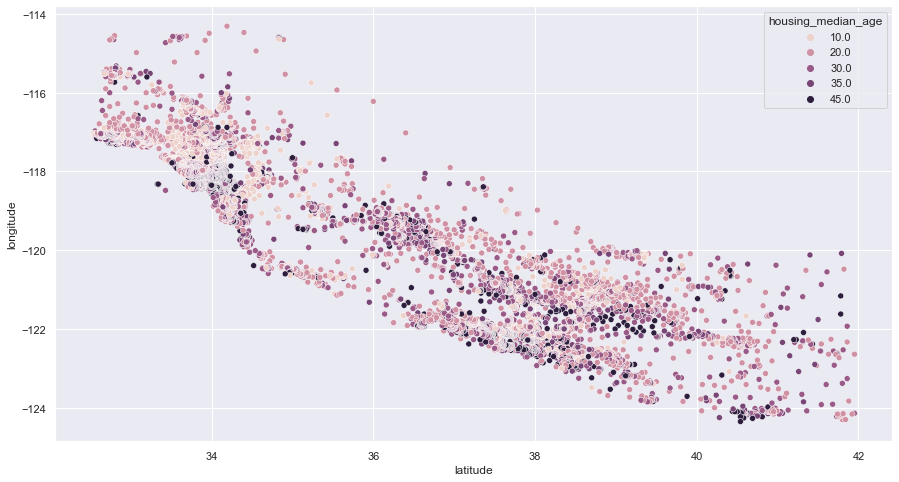

In [38]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude',data=df,hue='housing_median_age')
plt.show()

In [39]:
df['housing_median_age'].value_counts()

45.0    6344
30.0    4852
20.0    4724
35.0    3151
10.0    1569
Name: housing_median_age, dtype: int64

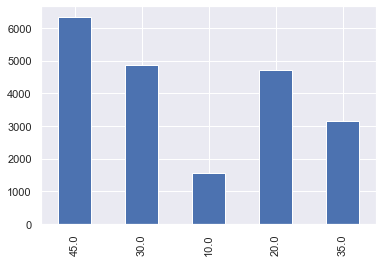

In [40]:
df['housing_median_age'].value_counts(sort=False).plot(kind='bar')
plt.show()

<font color=#228C22>**<u><strong>Observations</u>**\
<font color=#228C22>**Large numbers of houses between 35 years and 45 years then between 20 and 30.**

In [41]:
# remaping Age column
# df.loc[df['total_rooms'] <= 1500, 'total_rooms'] = 1500
# df.loc[(df['total_rooms'] > 1500) & (df['total_rooms'] <= 3000), 'total_rooms'] = 3000
# df.loc[(df['total_rooms'] > 3000) & (df['total_rooms'] <= 4500), 'total_rooms'] = 4500
# df.loc[(df['total_rooms'] > 4500) & (df['total_rooms'] <= 6000), 'total_rooms'] = 6000
# df.loc[df['total_rooms'] > 6000, 'total_rooms'] = 7500

In [42]:
remapColumn(df,'total_rooms')

In [43]:
df['total_rooms'].value_counts()

2750.0    9271
1375.0    4620
4125.0    3969
6875.0    1406
5500.0    1374
Name: total_rooms, dtype: int64

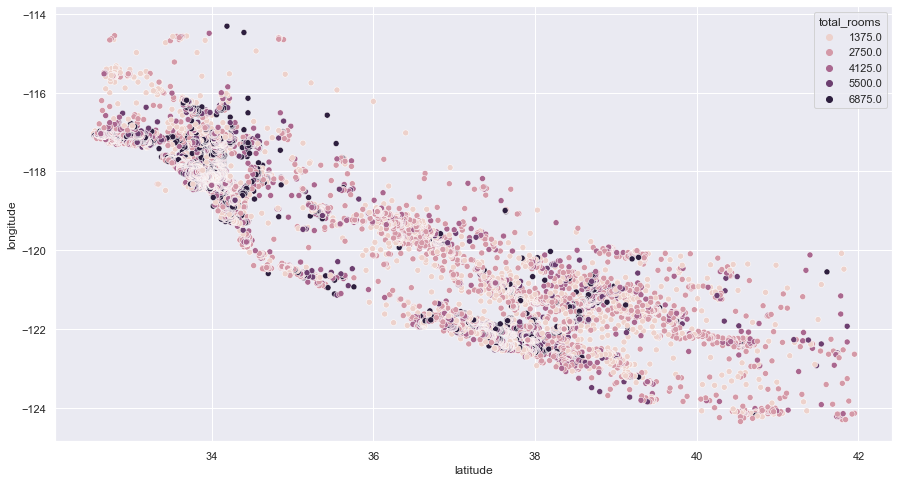

In [44]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude',data=df,hue='total_rooms')
plt.show()

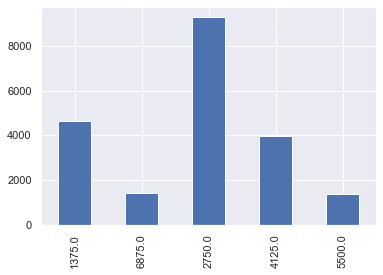

In [45]:
df['total_rooms'].value_counts(sort=False).plot(kind='bar')
plt.show()

<font color=#228C22>**<u><strong>Observations</u>**\
**Houses with total_room from 2750 to 4125 got the largest number**

In [48]:
remapColumn(df,'total_bedrooms')

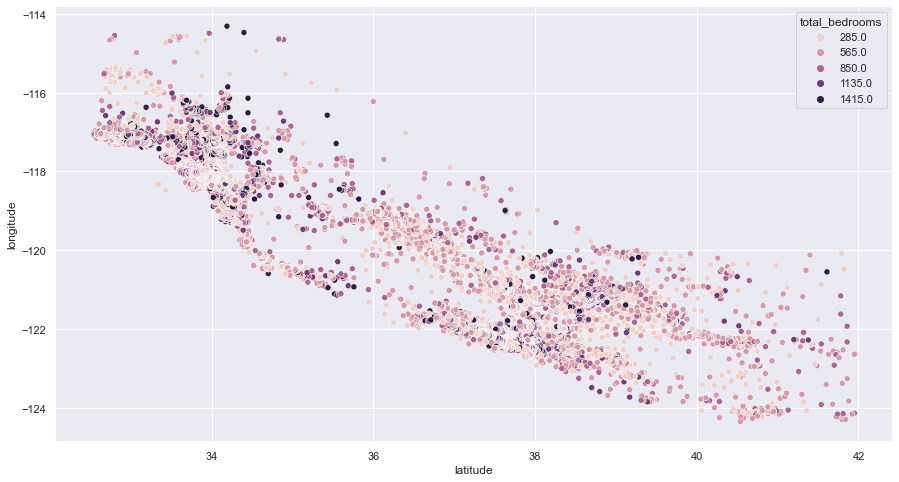

In [49]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude',data=df,hue='total_bedrooms')
plt.show()

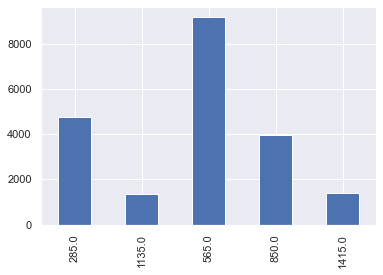

In [50]:
df['total_bedrooms'].value_counts(sort=False).plot(kind='bar')
plt.show()

<font color=#228C22>**<u><strong>Observations</u>**\
**Houses with total_bedrooms from 565 to 850 got the largest number**

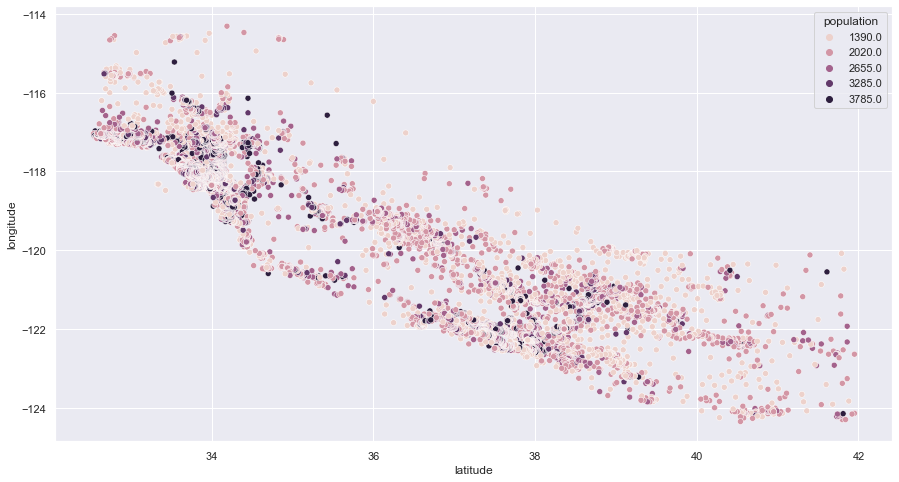

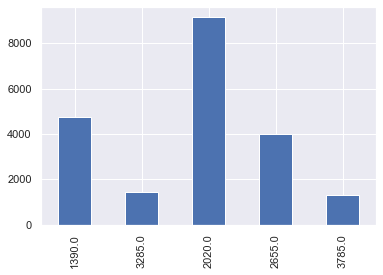

In [54]:
# remapColumn(df,'population')
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude',data=df,hue='population')
plt.show()
df['population'].value_counts(sort=False).plot(kind='bar')
plt.show()

<font color=#228C22>**<u><strong>Observations</u>**\
**Houses with population from 1515 to 2270 got the largest number**

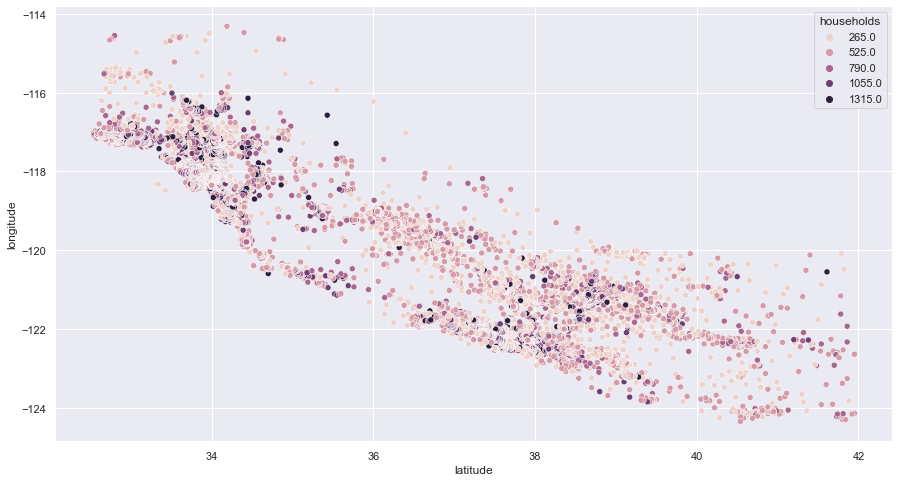

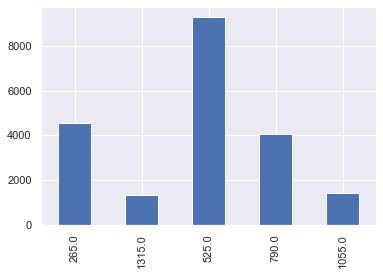

In [55]:
remapColumn(df,'households')
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude',data=df,hue='households')
plt.show()
df['households'].value_counts(sort=False).plot(kind='bar')
plt.show()

<font color=#228C22>**<u><strong>Observations</u>**\
**Houses with households from 525 to 790 got the largest number**

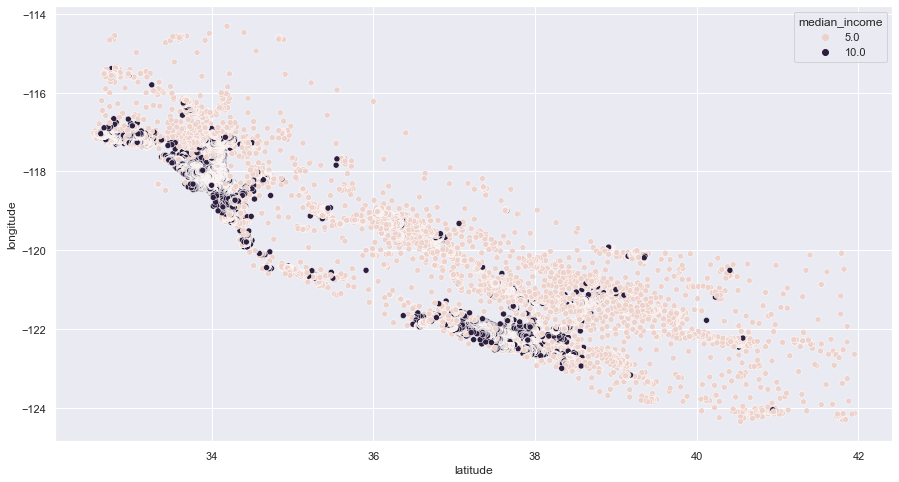

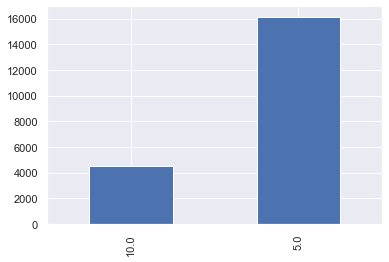

In [56]:
remapColumn(df,'median_income')
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude',data=df,hue='median_income')
plt.show()
df['median_income'].value_counts(sort=False).plot(kind='bar')
plt.show()

<font color=#228C22>**<u><strong>Observations</u>**\
**Houses with median_income from 5 to 10 got the largest number**

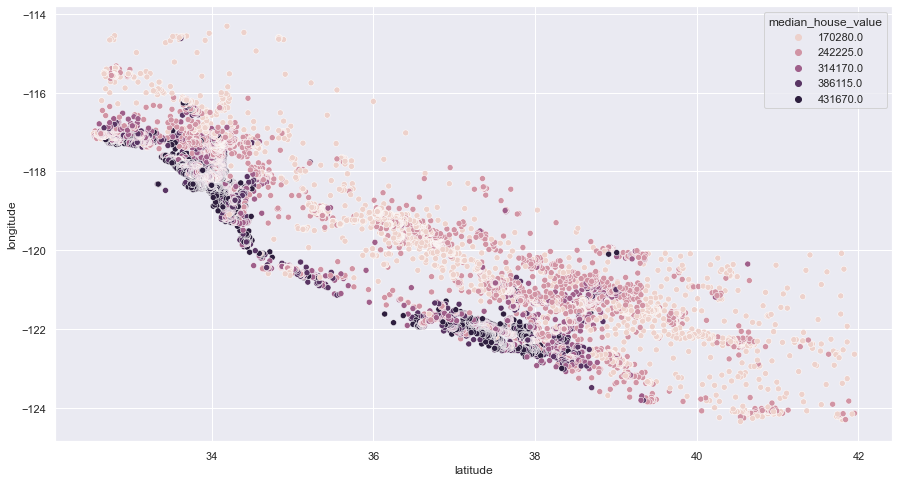

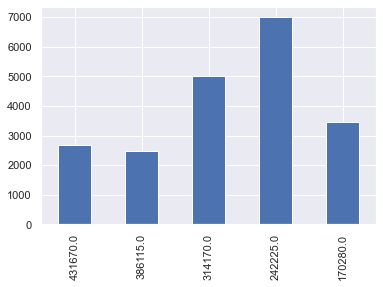

In [60]:
# remapColumn(df,'median_house_value')
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude',data=df,hue='median_house_value')
plt.show()
df['median_house_value'].value_counts(sort=False).plot(kind='bar')
plt.show()

<font color=#228C22>**<u><strong>Observations</u>**\
**Houses with median_house_value from 242225 to 314170 got the largest number**

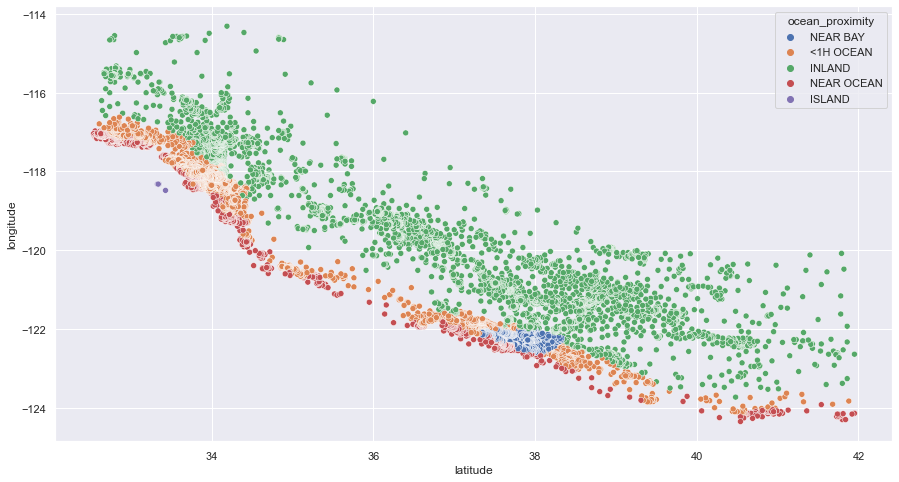

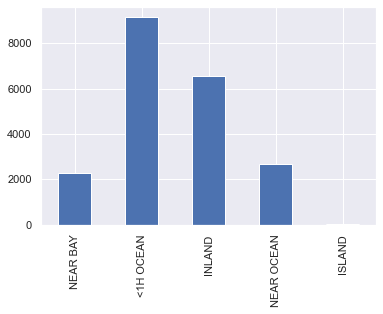

In [61]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude',data=df,hue='ocean_proximity')
plt.show()
df['ocean_proximity'].value_counts(sort=False).plot(kind='bar')
plt.show()

In [66]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,45.0,1375.0,285.0,1390.0,265.0,10.0,431670.0,NEAR BAY
1,-122.22,37.86,30.0,6875.0,1135.0,3285.0,1315.0,10.0,431670.0,NEAR BAY
2,-122.24,37.85,45.0,2750.0,285.0,1390.0,265.0,10.0,431670.0,NEAR BAY
3,-122.25,37.85,45.0,1375.0,285.0,1390.0,265.0,10.0,386115.0,NEAR BAY
4,-122.25,37.85,45.0,2750.0,285.0,1390.0,265.0,5.0,386115.0,NEAR BAY


<font color=#000ff>**Encoding Categorical Columns**

In [68]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

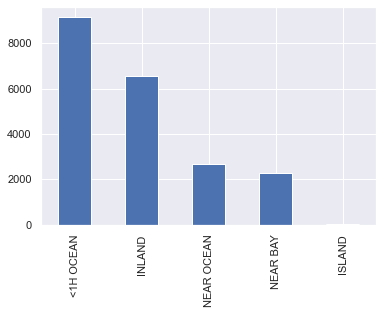

In [69]:
df['ocean_proximity'].value_counts().plot(kind='bar')

In [70]:
df['ocean_proximity'] = df['ocean_proximity'].map({'<1H OCEAN':5, 'INLAND':4,'NEAR OCEAN':3, 'NEAR BAY':2, 'ISLAND':1})

In [71]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,45.0,1375.0,285.0,1390.0,265.0,10.0,431670.0,2
1,-122.22,37.86,30.0,6875.0,1135.0,3285.0,1315.0,10.0,431670.0,2
2,-122.24,37.85,45.0,2750.0,285.0,1390.0,265.0,10.0,431670.0,2
3,-122.25,37.85,45.0,1375.0,285.0,1390.0,265.0,10.0,386115.0,2
4,-122.25,37.85,45.0,2750.0,285.0,1390.0,265.0,5.0,386115.0,2


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


<font color=#000ff>**Start Machine learning Process**

In [73]:
def splitData(data,columnOfinterset,*,normalize = False):
    x = data.drop(columnOfinterset,axis=1).values
    y = data[columnOfinterset].values
    y = y.reshape(-1,1)
    if normalize:
        scaler = MinMaxScaler()
        scaler.fit(x)
        x = scaler.fit_transform(x)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=1)
    return x_train,x_test,y_train,y_test

def checkShape(*args):
    for arg in args:
        print(arg.shape)
        
X_train,X_test,y_train,y_test = splitData(df,'median_house_value')
checkShape(X_train,X_test,y_train,y_test)

(13828, 9)
(6812, 9)
(13828, 1)
(6812, 1)


In [79]:
def RegressionAnalysis(model,x1,x2,y1,y2):
    def RegressionMetricsReport(y1,y2,*,kind='test'):
        error_1 = MAE(y1,y2)
        error_2 = MSE(y1,y2)
        error_3 = r2_score(y1,y2)
        error_4 = MAPE(y1,y2)
        print(f'\t\tMean Absolute Error({kind}): {error_1:0.3f}')
        print(f'\t\tMean Square Error({kind}): {error_2:0.3f}')
        print(f'\t\tR2_Squared({kind}): {error_3:0.3f}')
        print(f'\t\tMean Absolute Percentage Error({kind}): {error_4:0.3f}')
    model.fit(x1,y1.ravel())
    y1_pred = model.predict(x1)
    y2_pred = model.predict(x2)
    print(f'----{model.__class__.__name__} classification-------\n')
    print('\t----Train Error-------\n')
    RegressionMetricsReport(y1_pred,y1,kind='train')
    print()
    print('\t----Test Error-------\n')
    RegressionMetricsReport(y2_pred,y2)
    print()
    print()

In [102]:
knn = KNeighborsRegressor(n_neighbors=21)
reg = LinearRegression()
dt = DecisionTreeRegressor()
svm_reg = svm.SVR()
rf = RandomForestRegressor()
ada = AdaBoostRegressor()
br = BaggingRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
algs = [knn,reg,dt,svm_reg,rf, ada,br,gb, xgb]

In [103]:
reports = []
for alg in algs:
    reports.append(RegressionAnalysis(alg,X_train,X_test,y_train,y_test))

----KNeighborsRegressor classification-------

	----Train Error-------

		Mean Absolute Error(train): 42993.907
		Mean Square Error(train): 3118819510.797
		R2_Squared(train): 0.179
		Mean Absolute Percentage Error(train): 0.151

	----Test Error-------

		Mean Absolute Error(test): 44994.788
		Mean Square Error(test): 3450462613.390
		R2_Squared(test): 0.082
		Mean Absolute Percentage Error(test): 0.158


----LinearRegression classification-------

	----Train Error-------

		Mean Absolute Error(train): 46607.711
		Mean Square Error(train): 3386690644.299
		R2_Squared(train): 0.082
		Mean Absolute Percentage Error(train): 0.171

	----Test Error-------

		Mean Absolute Error(test): 46595.137
		Mean Square Error(test): 3375368334.219
		R2_Squared(test): 0.077
		Mean Absolute Percentage Error(test): 0.168


----DecisionTreeRegressor classification-------

	----Train Error-------

		Mean Absolute Error(train): 793.044
		Mean Square Error(train): 31036376.479
		R2_Squared(train): 0.996
		Mea

<font color=#228C22>**From the above model:\
    * Models(KNeighborsRegressor, LinearRegression) causes underfitting and large cost function in both training and testing.**\
*** Model (DecisionTreeRegressor) causes overfitting (large cost function in test but butter in training)**\
*** SVR classification is very bad selection Model**\
*** RandomForest is the most better one used** \
   *** AdaBoostRegressor and GradientBoostingRegressor also bad models**\
    *** but XGBRegressor classification give a very good values**
    

**I'll start tuning hyperparameters for both DecisionTreeRegressor and RandomForest and XGBRegressor**

In [104]:
rf = RandomForestRegressor()
parameters = {'criterion': ['gini', 'entropy'],'n_estimators':[50,100,300],'max_depth':[1,3,10]}
gsearch = GridSearchCV(rf, parameters)
#gsearch.fit(X_train,y_train.ravel())

In [90]:
gsearch.fit(X_train,y_train.ravel())

C:\Users\amira\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\amira\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amira\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\amira\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\amira\anaconda3\lib\site-packages\jo

KeyError: 'gini'